# Pog 4 - A Stack of Stacks (of Stacks?)

## Data Creation

In [1]:
import pandas as pd
import numpy as np

from data import POG4_Dataset

In [2]:

data = POG4_Dataset()

2023-03-24 10:08:01,362 - INFO - Creating XML data
2023-03-24 10:08:06,539 - INFO - Missing days: 154
2023-03-24 10:08:06,542 - INFO - Featurizing time series data
2023-03-24 10:08:06,573 - INFO - Creating interactions...
2023-03-24 10:08:06,586 - INFO - Dropped non-unique columns: ['BasalEnergyBurned_startDate_min_hr_sin', 'BasalEnergyBurned_startDate_min_hr_cos', 'StepCount_startDate_min_hr_sin', 'StepCount_startDate_min_hr_cos', 'BodyMassIndex_startDate_max_hr_sin', 'BodyMassIndex_startDate_max_hr_cos', 'BodyMassIndex_startDate_min_hr_sin', 'BodyMassIndex_startDate_min_hr_cos', 'BodyMassIndex_endDate_max_hr_sin', 'BodyMassIndex_endDate_max_hr_cos', 'BodyMassIndex_endDate_min_hr_sin', 'BodyMassIndex_endDate_min_hr_cos', 'BodyMassIndex_hrs_btween', 'DistanceWalkingRunning_startDate_min_hr_sin', 'DistanceWalkingRunning_startDate_min_hr_cos', 'is_holiday']
2023-03-24 10:08:06,592 - INFO - Dropped null columns: []


In [3]:
data.train.head()

,date,sleep_hours,BasalEnergyBurned,BasalEnergyBurned_startDate_max_hr_sin,BasalEnergyBurned_startDate_max_hr_cos,BasalEnergyBurned_endDate_max_hr_sin,BasalEnergyBurned_endDate_max_hr_cos,BasalEnergyBurned_endDate_min_hr_sin,BasalEnergyBurned_endDate_min_hr_cos,BasalEnergyBurned_hrs_btween,...,month,month_sin,month_cos,is_weekend,is_workday,is_daylight_savings,dow_median,distance_per_step,calorie_per_step,calorie_per_distance
0,2015-02-19,6.400000,1898.0,0.0,1.0,-0.258819,0.965926,-0.258819,0.965926,24.0,...,2,0.866025,0.5,0,1,0,6.708333,0.000492,0.711128,1446.789697
1,2015-02-20,7.583333,1898.0,0.0,1.0,-0.258819,0.965926,-0.258819,0.965926,24.0,...,2,0.866025,0.5,0,1,0,6.750000,0.000493,0.130429,264.791271
2,2015-02-21,6.350000,1898.0,0.0,1.0,-0.258819,0.965926,-0.258819,0.965926,24.0,...,2,0.866025,0.5,1,0,0,6.933333,0.000492,0.244304,496.350594
3,2015-02-22,6.500000,1898.0,0.0,1.0,-0.258819,0.965926,-0.258819,0.965926,24.0,...,2,0.866025,0.5,1,0,0,6.783333,0.000492,0.113823,231.576661
4,2015-02-23,8.916667,1898.0,0.0,1.0,-0.258819,0.965926,-0.258819,0.965926,24.0,...,2,0.866025,0.5,0,1,0,6.500000,0.000492,0.312377,635.530792


In [4]:
data.X.head()

,BasalEnergyBurned,BasalEnergyBurned_startDate_max_hr_sin,BasalEnergyBurned_startDate_max_hr_cos,BasalEnergyBurned_endDate_max_hr_sin,BasalEnergyBurned_endDate_max_hr_cos,BasalEnergyBurned_endDate_min_hr_sin,BasalEnergyBurned_endDate_min_hr_cos,BasalEnergyBurned_hrs_btween,BodyMass,BodyMass_startDate_max_hr_sin,...,month,month_sin,month_cos,is_weekend,is_workday,is_daylight_savings,dow_median,distance_per_step,calorie_per_step,calorie_per_distance
0,1898.0,0.0,1.0,-0.258819,0.965926,-0.258819,0.965926,24.0,188.799,0.0,...,2,0.866025,0.5,0,1,0,6.708333,0.000492,0.711128,1446.789697
1,1898.0,0.0,1.0,-0.258819,0.965926,-0.258819,0.965926,24.0,188.799,0.0,...,2,0.866025,0.5,0,1,0,6.750000,0.000493,0.130429,264.791271
2,1898.0,0.0,1.0,-0.258819,0.965926,-0.258819,0.965926,24.0,188.799,0.0,...,2,0.866025,0.5,1,0,0,6.933333,0.000492,0.244304,496.350594
3,1898.0,0.0,1.0,-0.258819,0.965926,-0.258819,0.965926,24.0,188.799,0.0,...,2,0.866025,0.5,1,0,0,6.783333,0.000492,0.113823,231.576661
4,1898.0,0.0,1.0,-0.258819,0.965926,-0.258819,0.965926,24.0,188.799,0.0,...,2,0.866025,0.5,0,1,0,6.500000,0.000492,0.312377,635.530792


In [5]:
data.y.head()

0    6.400000
1    7.583333
2    6.350000
3    6.500000
4    8.916667
Name: sleep_hours, dtype: float64

## Simple Models - Variance Control

In [6]:
class SuperSimpleModel:
    def __init__(self, value):
        self.value = value
        
    def predict(self, X):
        return np.ones(len(X)) * self.value

In [7]:
median = data.train["sleep_hours"].median()
print(f"Median sleep hours: {median}")

sub_median = data.create_submission(SuperSimpleModel(median))
sub_median.head()

2023-03-24 10:08:06,761 - INFO - Creating submission dataset
2023-03-24 10:08:06,765 - INFO - Featurizing time series data
2023-03-24 10:08:06,779 - INFO - Creating interactions...


Median sleep hours: 6.666666666666667


,date,sleep_hours
0,2022-01-01,6.666667
1,2022-01-02,6.666667
2,2022-01-03,6.666667
3,2022-01-04,6.666667
4,2022-01-05,6.666667


In [8]:
mean = data.train["sleep_hours"].mean()
print(f"Mean sleep hours: {mean}")

sub_mean = data.create_submission(SuperSimpleModel(mean))
sub_mean.head()

2023-03-24 10:08:06,804 - INFO - Creating submission dataset
2023-03-24 10:08:06,809 - INFO - Featurizing time series data
2023-03-24 10:08:06,822 - INFO - Creating interactions...


Mean sleep hours: 6.650223024638913


,date,sleep_hours
0,2022-01-01,6.650223
1,2022-01-02,6.650223
2,2022-01-03,6.650223
3,2022-01-04,6.650223
4,2022-01-05,6.650223


In [9]:
class SimpleModel:
    def __init__(self, value_group, group):
        self.value_group = value_group
        self.group = group
        
    def predict(self, X):
        return X[self.group].map(self.value_group)

In [10]:
median_dow = data.train.groupby("day_of_week")["sleep_hours"].median()
print(median_dow)

sub_median_dow = data.create_submission(SimpleModel(median_dow, "day_of_week"))
sub_median_dow.head()

2023-03-24 10:08:06,883 - INFO - Creating submission dataset
2023-03-24 10:08:06,888 - INFO - Featurizing time series data
2023-03-24 10:08:06,902 - INFO - Creating interactions...


day_of_week
0    6.500000
1    6.500000
2    6.537500
3    6.708333
4    6.750000
5    6.933333
6    6.783333
Name: sleep_hours, dtype: float64


,date,sleep_hours
0,2022-01-01,6.933333
1,2022-01-02,6.783333
2,2022-01-03,6.500000
3,2022-01-04,6.500000
4,2022-01-05,6.537500


In [11]:
mean_dow = data.train.groupby("day_of_week")["sleep_hours"].mean()
print(mean_dow)

sub_mean_dow = data.create_submission(SimpleModel(mean_dow, "day_of_week"))
sub_mean_dow.head()

2023-03-24 10:08:06,939 - INFO - Creating submission dataset
2023-03-24 10:08:06,943 - INFO - Featurizing time series data
2023-03-24 10:08:06,957 - INFO - Creating interactions...


day_of_week
0    6.452844
1    6.479463
2    6.548088
3    6.664778
4    6.661512
5    6.946573
6    6.799233
Name: sleep_hours, dtype: float64


,date,sleep_hours
0,2022-01-01,6.946573
1,2022-01-02,6.799233
2,2022-01-03,6.452844
3,2022-01-04,6.479463
4,2022-01-05,6.548088


In [12]:
median_workday = data.train.groupby("is_workday")["sleep_hours"].median()
print(median_workday)

sub_median_workday = data.create_submission(SimpleModel(median_workday, "is_workday"))
sub_median_workday.head()

2023-03-24 10:08:06,986 - INFO - Creating submission dataset
2023-03-24 10:08:06,990 - INFO - Featurizing time series data
2023-03-24 10:08:07,004 - INFO - Creating interactions...


is_workday
0    6.85
1    6.60
Name: sleep_hours, dtype: float64


,date,sleep_hours
0,2022-01-01,6.85
1,2022-01-02,6.85
2,2022-01-03,6.60
3,2022-01-04,6.60
4,2022-01-05,6.60


In [13]:
mean_workday = data.train.groupby("is_workday")["sleep_hours"].mean()
print(mean_workday)

sub_mean_workday = data.create_submission(SimpleModel(mean_workday, "is_workday"))
sub_mean_workday.head()

2023-03-24 10:08:07,032 - INFO - Creating submission dataset
2023-03-24 10:08:07,036 - INFO - Featurizing time series data
2023-03-24 10:08:07,050 - INFO - Creating interactions...


is_workday
0    6.873012
1    6.560656
Name: sleep_hours, dtype: float64


,date,sleep_hours
0,2022-01-01,6.873012
1,2022-01-02,6.873012
2,2022-01-03,6.560656
3,2022-01-04,6.560656
4,2022-01-05,6.560656


## Big-boy Models - Bias Control

In [14]:
# Now that simple model mappings are create we can split training data and preprocess (impute & scale)
data.train_test_split()
data.preprocess_data()

2023-03-24 10:08:07,074 - INFO - Splitting data into train and test set
2023-03-24 10:08:07,076 - INFO - Scaling and imputing data


(      BasalEnergyBurned  BasalEnergyBurned_startDate_max_hr_sin  \
 0             -0.337965                                     0.0   
 1             -0.337965                                     0.0   
 2             -0.337965                                     0.0   
 3             -0.337965                                     0.0   
 4             -0.337965                                     0.0   
 ...                 ...                                     ...   
 2001           0.244545                                     0.0   
 2002           0.232657                                     0.0   
 2003           0.185105                                     0.0   
 2004           0.220769                                     0.0   
 2005           0.232657                                     0.0   
 
       BasalEnergyBurned_startDate_max_hr_cos  \
 0                                        0.0   
 1                                        0.0   
 2                                 

### Prophet by Facebook

In [15]:
!pip install prophet

In [16]:
import json

with open("prophet_best_params.json", "r") as f:
    prophet_best_params = json.load(f)
    
print("Best Parameters for XGBoost: ", prophet_best_params)

Best Parameters for XGBoost:  {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


In [17]:
df_p = data.train.copy()
df_p = df_p.fillna(method="ffill").fillna(0) #Ok for Time Series
df_p = df_p.rename(columns={'date': 'ds', 'sleep_hours': 'y'})
df_p.head()

,ds,y,BasalEnergyBurned,BasalEnergyBurned_startDate_max_hr_sin,BasalEnergyBurned_startDate_max_hr_cos,BasalEnergyBurned_endDate_max_hr_sin,BasalEnergyBurned_endDate_max_hr_cos,BasalEnergyBurned_endDate_min_hr_sin,BasalEnergyBurned_endDate_min_hr_cos,BasalEnergyBurned_hrs_btween,...,month,month_sin,month_cos,is_weekend,is_workday,is_daylight_savings,dow_median,distance_per_step,calorie_per_step,calorie_per_distance
0,2015-02-19,6.400000,1898.0,0.0,1.0,-0.258819,0.965926,-0.258819,0.965926,24.0,...,2,0.866025,0.5,0,1,0,6.708333,0.000492,0.711128,1446.789697
1,2015-02-20,7.583333,1898.0,0.0,1.0,-0.258819,0.965926,-0.258819,0.965926,24.0,...,2,0.866025,0.5,0,1,0,6.750000,0.000493,0.130429,264.791271
2,2015-02-21,6.350000,1898.0,0.0,1.0,-0.258819,0.965926,-0.258819,0.965926,24.0,...,2,0.866025,0.5,1,0,0,6.933333,0.000492,0.244304,496.350594
3,2015-02-22,6.500000,1898.0,0.0,1.0,-0.258819,0.965926,-0.258819,0.965926,24.0,...,2,0.866025,0.5,1,0,0,6.783333,0.000492,0.113823,231.576661
4,2015-02-23,8.916667,1898.0,0.0,1.0,-0.258819,0.965926,-0.258819,0.965926,24.0,...,2,0.866025,0.5,0,1,0,6.500000,0.000492,0.312377,635.530792


In [18]:
import itertools

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

m = Prophet()

# Add the additional regressors
for col in [col for col in df_p.columns if col not in ["ds", "y"]]:
    m.add_regressor(col)

m = Prophet(**prophet_best_params).fit(df_p)  # Fit model with best params

2023-03-24 10:08:08,549 - INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2023-03-24 10:08:08,558 - DEBUG - input tempfile: /tmp/tmpcxh4tymx/cadax4de.json
2023-03-24 10:08:08,599 - DEBUG - input tempfile: /tmp/tmpcxh4tymx/9_cudid9.json
2023-03-24 10:08:08,600 - DEBUG - idx 0
2023-03-24 10:08:08,601 - DEBUG - running CmdStan, num_threads: None
2023-03-24 10:08:08,601 - DEBUG - CmdStan args: ['/home/sebastian/mambaforge/envs/pog4-sleep/lib/python3.9/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71750', 'data', 'file=/tmp/tmpcxh4tymx/cadax4de.json', 'init=/tmp/tmpcxh4tymx/9_cudid9.json', 'output', 'file=/tmp/tmpcxh4tymx/prophet_modeld8lprp18/prophet_model-20230324100808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:08:08 - cmdstanpy - INFO - Chain [1] start processing
2023-03-24 10:08:08,601 - INFO - Chain [1] start processing
10:08:08 - cmdstanpy - INFO - Chain [1] done processing
2023-03-24 10:08:08,679 

In [19]:
class ProphetModel:
    def __init__(self, model):
        self.model = model
        
    def predict(self, X):
        X = X.fillna(method="ffill").fillna(0)
        X = X.rename(columns={'date': 'ds'})
        return self.model.predict(df_p)["yhat"]

sub_prophet = data.create_submission(ProphetModel(m))
sub_prophet.head()

2023-03-24 10:08:08,707 - INFO - Creating submission dataset
2023-03-24 10:08:08,713 - INFO - Featurizing time series data
2023-03-24 10:08:08,729 - INFO - Creating interactions...


,date,sleep_hours
0,2022-01-01,7.246419
1,2022-01-02,7.234052
2,2022-01-03,7.483601
3,2022-01-04,7.346334
4,2022-01-05,7.013963


### XGBoost (for Bojan)

In [20]:
import json

with open("xgb_best_params.json", "r") as f:
    xgb_best_params = json.load(f)
    
print("Best Parameters for XGBoost: ", xgb_best_params)

Best Parameters for XGBoost:  {'colsample_bytree': 0.3779489002612136, 'learning_rate': 0.013654260905684338, 'max_depth': 3, 'n_estimators': 415, 'subsample': 0.395916346001681}


In [21]:
from xgboost import XGBRegressor

xgb = XGBRegressor(tree_method='gpu_hist', gpu_id=0, **xgb_best_params)
xgb.fit(data.X_train, data.y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3779489002612136, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.013654260905684338,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=415, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [22]:
sub_xgb = data.create_submission(xgb)
sub_xgb.head()

2023-03-24 10:08:10,045 - INFO - Creating submission dataset
2023-03-24 10:08:10,050 - INFO - Featurizing time series data
2023-03-24 10:08:10,075 - INFO - Creating interactions...


,date,sleep_hours
0,2022-01-01,6.992192
1,2022-01-02,6.741740
2,2022-01-03,6.573010
3,2022-01-04,6.699351
4,2022-01-05,6.694783


### GRU (and his minions)

In [44]:
import json

with open("gru_best_params.json", "r") as f:
    gru_best_params = json.load(f)
    
print("Best Parameters for GRU: ", gru_best_params)

Best Parameters for GRU:  {'lookback': 5, 'criterion': 'mae', 'optimizer': 'sgd', 'batch_size': 76, 'num_epochs': 300, 'num_layers': 4, 'hidden_size': 82, 'dropout_rate': 0.3877865740473013, 'learning_rate': 0.0014826529458124174, 'activation_function': 'sigmoid'}


In [48]:
from gru import TimeSeriesDataset, GRUModel, GRUTrainer

import torch
import torch.nn as nn
from torch.optim import Adam, SGD, RMSprop, AdamW
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [49]:
y_train_scaled, y_test_scaled = data.scale_target()

y_train_scaled = pd.DataFrame(y_train_scaled, columns=["sleep_hours"])
y_test_scaled = pd.DataFrame(y_test_scaled, columns=["sleep_hours"])

train = pd.concat([data.X_train, y_train_scaled], axis=1)
test = pd.concat([data.X_test, y_test_scaled], axis=1)

train = pd.concat([train, test], axis=0).to_numpy() # Training on entire dataset since tuned hyperparameters

input_size = train.shape[1] # Number of features (plus 1 for the target)
output_size = 1 # Number of targets

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # CUDA support

2023-03-24 10:25:19,740 - INFO - Scaling target variable with minmax


In [50]:
# Feature Config
lookback= gru_best_params["lookback"] # Lookback window size
batch_size = gru_best_params["batch_size"]

train = TimeSeriesDataset(train, lookback, output_size)
train = DataLoader(train, batch_size=batch_size, shuffle=True)


In [51]:
# Model Config
hidden_size= gru_best_params["hidden_size"]
num_layers= gru_best_params["num_layers"]
learning_rate = gru_best_params["learning_rate"]
dropout_rate = gru_best_params["dropout_rate"]
activation_function = gru_best_params["activation_function"]

model = GRUModel(device, input_size, hidden_size, num_layers, output_size, dropout_rate, activation_function).to(device)

In [52]:
# Training Config
criterion = gru_best_params["criterion"]
optimizer = gru_best_params["optimizer"]
num_epochs = gru_best_params["num_epochs"]

target_scaler = data.target_scaler # Inverse scaling is used to calculate validation RMSE

trainer = GRUTrainer(model, device, learning_rate, criterion, optimizer, target_scaler)

In [53]:
for epoch in range(num_epochs):
    train_loss = trainer.train(train)
    val_loss = trainer.evaluate(train)
    print(f"Epoch {epoch+1}/{num_epochs}, train_{criterion}: {train_loss:.4f}, valid_rmse: {val_loss:.4f}")

Epoch 1/300, train_mae: 0.1321, valid_rmse: 1.1061
Epoch 2/300, train_mae: 0.1284, valid_rmse: 1.1355
Epoch 3/300, train_mae: 0.1257, valid_rmse: 1.1399
Epoch 4/300, train_mae: 0.1249, valid_rmse: 1.1188
Epoch 5/300, train_mae: 0.1237, valid_rmse: 1.1109
Epoch 6/300, train_mae: 0.1213, valid_rmse: 1.1066
Epoch 7/300, train_mae: 0.1185, valid_rmse: 1.1028
Epoch 8/300, train_mae: 0.1174, valid_rmse: 1.1072
Epoch 9/300, train_mae: 0.1167, valid_rmse: 1.0990
Epoch 10/300, train_mae: 0.1165, valid_rmse: 1.0858
Epoch 11/300, train_mae: 0.1130, valid_rmse: 1.0846
Epoch 12/300, train_mae: 0.1110, valid_rmse: 1.0892
Epoch 13/300, train_mae: 0.1089, valid_rmse: 1.0788
Epoch 14/300, train_mae: 0.1090, valid_rmse: 1.0751
Epoch 15/300, train_mae: 0.1073, valid_rmse: 1.0689
Epoch 16/300, train_mae: 0.1076, valid_rmse: 1.0640
Epoch 17/300, train_mae: 0.1078, valid_rmse: 1.0629
Epoch 18/300, train_mae: 0.1039, valid_rmse: 1.0526
Epoch 19/300, train_mae: 0.1024, valid_rmse: 1.0539
Epoch 20/300, train_m

In [54]:
class GRU_Output:
    def __init__(self, model, lookback, target_scaler):
        self.model = model
        self.lookback = lookback
        self.target_scaler = target_scaler
        
    def predict(self, X):
        num_predictions = X.shape[0]
        X = torch.from_numpy(X.to_numpy()).float()
        y_pred = self.model.predict(X, self.lookback, 1, num_predictions)
        y_pred = self.target_scaler.inverse_transform(y_pred)
        
        return y_pred
    

In [55]:
sub_gru = data.create_submission(GRU_Output(trainer, lookback, target_scaler))
sub_gru.head()

2023-03-24 10:26:04,454 - INFO - Creating submission dataset
2023-03-24 10:26:04,460 - INFO - Featurizing time series data
2023-03-24 10:26:04,474 - INFO - Creating interactions...


,date,sleep_hours
0,2022-01-01,6.681274
1,2022-01-02,6.727648
2,2022-01-03,6.787961
3,2022-01-04,6.852069
4,2022-01-05,6.916386


### Extra Trees

In [57]:
with open("et_best_params.json", "r") as f:
    et_best_params = json.load(f)
    
print("Best Parameters for ExtraTrees: ", et_best_params)

Best Parameters for ExtraTrees:  {'bootstrap': True, 'max_depth': 12, 'max_features': 'log2', 'n_estimators': 1807, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [58]:
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor(**et_best_params)
et.fit(data.X_train, data.y_train)

ExtraTreesRegressor(bootstrap=True, max_depth=12, max_features='log2',
                    min_samples_leaf=3, n_estimators=1807)

In [59]:
sub_et = data.create_submission(et)
sub_et.head()

2023-03-24 10:55:19,298 - INFO - Creating submission dataset
2023-03-24 10:55:19,304 - INFO - Featurizing time series data
2023-03-24 10:55:19,318 - INFO - Creating interactions...


,date,sleep_hours
0,2022-01-01,7.261511
1,2022-01-02,6.856358
2,2022-01-03,7.153318
3,2022-01-04,6.978071
4,2022-01-05,6.962549


# Stacks on Stacks

In [78]:
# Average all submissions
def average_prediction(dfs):
    for idx, df in enumerate(dfs):
        df["source"] = idx

    dfs = pd.concat(dfs)
    avg_df = dfs.groupby("date")["sleep_hours"].mean().reset_index()
    return avg_df
                                       
simple_weight = 0.5
complex_weight = 1.0 - simple_weight

sub_dfs_simple = [sub_median, sub_mean, sub_median_dow, sub_mean_dow, sub_median_workday, sub_mean_workday]
sub_dfs_complex = [sub_prophet, sub_xgb, sub_gru, sub_et]

# Calculate the average prediction for each list of DataFrames
avg_simple = average_prediction(sub_dfs_simple)
avg_complex = average_prediction(sub_dfs_complex)

stacks_on_stacks = avg_simple.merge(avg_complex, on="date", suffixes=("_simple", "_complex"))

# Calculate the weighted average
stacks_on_stacks["sleep_hours"] = simple_weight * stacks_on_stacks["sleep_hours_simple"] + complex_weight * stacks_on_stacks["sleep_hours_complex"]
stacks_on_stacks = stacks_on_stacks[["date", "sleep_hours"]]
stacks_on_stacks.head()

,date,sleep_hours
0,2022-01-01,6.907108
1,2022-01-02,6.812890
2,2022-01-03,6.801425
3,2022-01-04,6.787645
4,2022-01-05,6.757523


<Axes: >

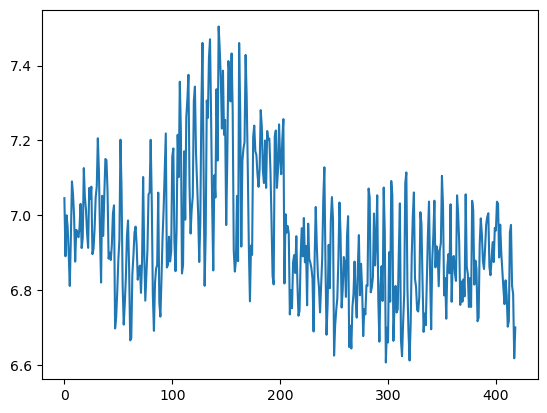

In [79]:
avg_complex.sleep_hours.plot()

<Axes: >

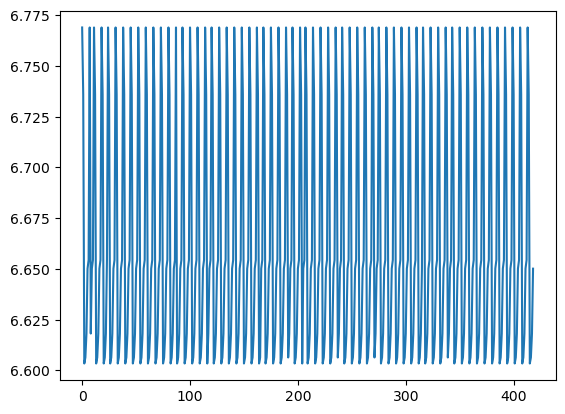

In [80]:
avg_simple.sleep_hours.plot()

<Axes: >

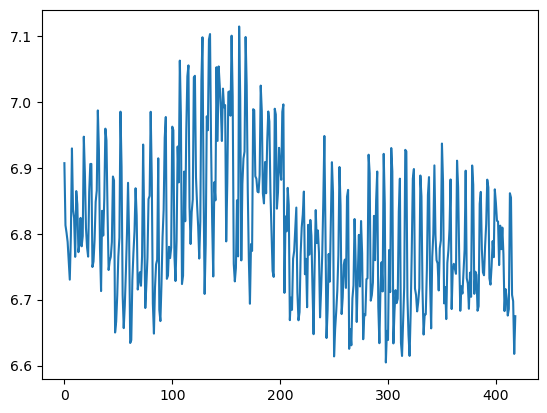

In [81]:
stacks_on_stacks.sleep_hours.plot()

In [ ]:
stacks_on_stacks.to_csv("submission_combined.csv", index=False)
#kaggle competitions submit -c kaggle-pog-series-s01e04 -f submission_combined.csv -m "Model Stacking v2"